# Lab | Data Aggregation and Filtering

Objective: Use Python programming techniques to filter and order data subsets, group data by one or more variables, and use aggregation functions to obtain insights, and derive meaningful conclusions from the data.

In this challenge, we will continue to work with customer data from an insurance company. We will use the dataset called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing first data cleaning, formatting, and structuring.

Start by reading the dataset, standardizing column names, dealing with null values and creating the month column. You can do so by using the functions you developed in previous labs, or by reading the clean dataset you saved in the last lab `data structuring and combining`.

Then, answer the following questions:

1. Create a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.

2. Analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign.

3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.

4. Find the median customer lifetime value by education level and gender.

5. Find the maximum, minimum, and average number of open complaints by state and policy type.

6. The marketing team wants to analyze the number of policies sold by state and month.

Present the data in a table where the months are arranged as columns and the states are arranged as rows.

7. Display a new DataFrame that contains the number of policies sold by month by state for the top 3 states with the highest number of policies sold.

*Hint:* 
- *To accomplish this, you will first need to group the data by state and month, then count the number of policies sold for each group. Afterwards, you will need to sort the data by the count of policies sold in descending order.*
- *Next, you will select the top 3 states with the highest number of policies sold.*
- *Finally, you will create a new DataFrame that contains the number of policies sold by month for each of the top 3 states.*

8. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

External Resources for Data Filtering: https://towardsdatascience.com/filtering-data-frames-in-pandas-b570b1f834b9

## Reading the cleaned dataset

In [1]:
import pandas as pd

df = pd.read_csv("marketing_customer_analysis_clean.csv")

**1. Creating a new DataFrame that only includes customers who have a total_claim_amount greater than $1,000 and have a response of "Yes" to the last marketing campaign.**

In [2]:
df_1 = df[(df["total_claim_amount"]>1000) & (df["response"]=="Yes")]

**2. Analyze the average total_claim_amount by each policy type and gender for customers who have responded "Yes" to the last marketing campaign.**

In [3]:
df_2 = df[(df["response"]=="Yes")]
df_2.groupby(["policy_type","gender"])["total_claim_amount"].mean()

policy_type     gender
Corporate Auto  F         431.480117
                M         412.756888
Personal Auto   F         454.089997
                M         453.603715
Special Auto    F         455.648867
                M         414.799291
Name: total_claim_amount, dtype: float64

**3. Analyze the total number of customers who have policies in each state, and then filter the results to only include states where there are more than 500 customers.**

In [7]:
df_state = df.groupby("state")["customer"].count()
df_state = df_state[df_state>500]
df_state

state
Arizona       1703
California    3150
Nevada         882
Oregon        2601
Washington     798
Name: customer, dtype: int64

**4. Find the median customer lifetime value by education level and gender.**

In [16]:
df_med = df.groupby(["education","gender"])["customer_lifetime_value"].median()
df_med

education             gender
Bachelor              F         5678.050167
                      M         5555.830205
College               F         5621.789489
                      M         5989.773931
Doctor                F         5332.462694
                      M         5620.587184
High School or Below  F         6044.020038
                      M         6176.700392
Master                F         5801.128252
                      M         5617.956917
Name: customer_lifetime_value, dtype: float64

**5. Find the maximum, minimum, and average number of open complaints by state and policy type.**

In [21]:
okii = df.groupby(["state","policy_type"])["nb_of_open_complaints"].aggregate(["max","min","mean"])
okii

max  min      mean
state      policy_type                       
Arizona    Corporate Auto    5    0  0.372372
           Personal Auto     5    0  0.393658
           Special Auto      3    0  0.259740
California Corporate Auto    4    0  0.315291
           Personal Auto     5    0  0.400348
           Special Auto      5    0  0.460177
Nevada     Corporate Auto    5    0  0.451282
           Personal Auto     5    0  0.412577
           Special Auto      5    0  0.600000
Oregon     Corporate Auto    4    0  0.335185
           Personal Auto     5    0  0.373065
           Special Auto      5    0  0.341463
Washington Corporate Auto    5    0  0.490683
           Personal Auto     5    0  0.385502
           Special Auto      4    0  0.533333

**6. The marketing team wants to analyze the number of policies sold by state and month.**

**Present the data in a table where the months are arranged as columns and the states are arranged as rows.**

In [30]:
# Method 1

pivot_table = pd.pivot_table(df, values='nb_of_policies', index=['state'], columns=['months'], aggfunc=sum)
pivot_table

months,1,2
state,,
Arizona,2743,2481
California,4979,4369
Nevada,1343,1106
Oregon,4143,3592
Washington,1219,1118


In [38]:
# Method 2

pol = df.groupby(["state","months"])["nb_of_policies"].sum().unstack()
pol

months,1,2
state,,
Arizona,2743,2481
California,4979,4369
Nevada,1343,1106
Oregon,4143,3592
Washington,1219,1118


**7. Display a new DataFrame that contains the number of policies sold by month by state for the top 3 states with the highest number of policies sold.**

In [85]:
easy = df.groupby(["state","months"])["nb_of_policies"].sum().sort_values(ascending=False)
easy = easy.reset_index()
easy

,state,months,nb_of_policies
0,California,1,4979
1,California,2,4369
2,Oregon,1,4143
3,Oregon,2,3592
4,Arizona,1,2743
5,Arizona,2,2481
6,Nevada,1,1343
7,Washington,1,1219
8,Washington,2,1118
9,Nevada,2,1106


In [110]:
states = easy["state"].unique()[:3]
states

array(['California', 'Oregon', 'Arizona'], dtype=object)

In [111]:
top = easy[easy['state'].isin(states)]
top

,state,months,nb_of_policies
0,California,1,4979
1,California,2,4369
2,Oregon,1,4143
3,Oregon,2,3592
4,Arizona,1,2743
5,Arizona,2,2481


**8. The marketing team wants to analyze the effect of different marketing channels on the customer response rate.**

Hint: You can use melt to unpivot the data and create a table that shows the customer response rate (those who responded "Yes") by marketing channel.

In [137]:
response_yes = df[df["response"]=="Yes"]
table = pd.pivot_table(response_yes,values="response",index="sales_channel",aggfunc="count")
table.columns = ["Responded Yes"]

In [150]:
table["Response Rate of Yes(%)"]= round((table["Responded Yes"]/table["Responded Yes"].sum())*100,2)

In [166]:
table["Response Rate(%)"]= round(table["Responded Yes"]/df["response"].count()*100,2)

In [167]:
table

,Responded Yes,Response Rate of Yes(%),Response Rate(%)
sales_channel,,,
Agent,666,50.92,7.29
Branch,294,22.48,3.22
Call Center,192,14.68,2.10
Web,156,11.93,1.71


In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Axes: xlabel='sales_channel', ylabel='count'>

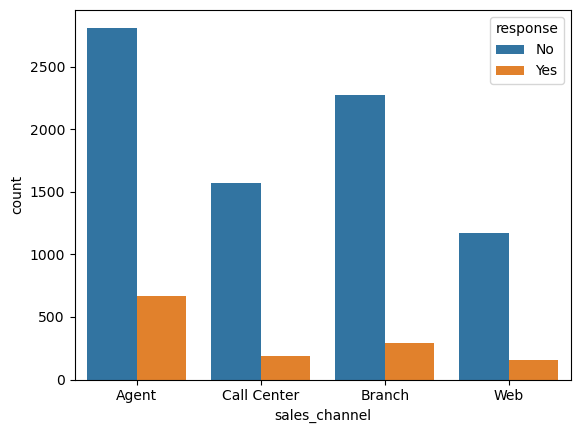

In [168]:
sns.countplot(df,x="sales_channel",hue="response")